<a href="https://colab.research.google.com/github/Raahul-Raj/Dating-App-Premium-Prediction/blob/main/sam_project_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import pandas as pd

# Use pd.read_excel to read the excel file into a DataFrame
df = pd.read_excel('Realistic_Synthetic_Diabetes_Data.xlsx')
df.head()

# Ensure height and weight are numeric for BMI calculation
df['height_(in_cm)'] = pd.to_numeric(df['height_(in_cm)'], errors='coerce')
df['weight_(in_kg)'] = pd.to_numeric(df['weight_(in_kg)'], errors='coerce')

# Convert height from cm to meters for BMI calculation
df['height_(in_m)'] = df['height_(in_cm)'] / 100

# Calculate BMI using the formula BMI = weight (kg) / height (m)^2
df['bmi'] = df['weight_(in_kg)'] / (df['height_(in_m)'] ** 2)



Dataset Observations:

Survey Details:

Personal information like email address, gender, and activity levels.
Questions about health habits, family history of diabetes, and use of health-monitoring tools.
Numeric Data:
Includes attributes such as height, weight, BMI, and calculated metrics.

Categorical Data:
'
Contains attributes like alcohol consumption, risk level (high/low/medium), and sleep habits.
Missing Values:

Several columns seem to have missing or incomplete data.

Potential Issues:

Some numeric values seem illogical (e.g., height in cm reaching 245+) may be an error while entering

## We do not need the email address coloumn , as wont be of importance in making a classification model to predict classification of diabetics ( yes / no )

In [338]:
# Drop the "email_address" column from the dataset as instructed
df.drop(columns=["email_address"], inplace=True)
df = df.drop(columns=['surveyors_info'])

# Confirm the column has been removed
df.head()


,what_is_your_gender?,how_often_do_you_engage_in_physical_exercise_per_week?,do_you_track_your_steps_per_day,do_you_track_your_protein_intake?,"on_average,_how_many_hours_do_you_sleep_per_night?",do_you_smoke_or_use_tobacco_products?,how_often_do_you_consume_sugary_drinks_or_processed_foods?,family_history_of_diabetes,"daily_consumption_of_vegetables,_fruits,_or_berries",mention_your_height_and_weight,...,have_you_ever_been_diagnosed_with_high_blood_pressure?,"if_you_have_used_any_health_monitoring_tools_or_apps,_please_specify_which_ones_and_share_your_experience_with_their_effectiveness_in_managing_your_health.",how_concerned_are_you_about_your_risk_of_developing_diabetes?,do_you_track_the_steps_you_take_in_a_day?,how_often_do_you_consume_alcohol?,risk_-_high/low/medium,height_(in_cm),weight_(in_kg),height_(in_m),bmi
0,female,more than 4 times per week,Yes,No,7-8 hours,No,Occasionally,No,Yes,"5' 5"", 54",...,No,NaN,Somewhat concerned,Yes,1-2 times a week,medium,166.114247,61.0,1.661142,22.106301
1,male,3-4 times per week,No,No,NaN,No,Occasionally,No,Yes,"5.8, 68 weight",...,No,Yes,Very concerned,Yes,1-2 times a week,low,167.507679,75.9,1.675077,27.050315
2,male,1-2 times per week,No,No,7-8 hours,No,Rarely,Yes,Yes,173cm 90kg,...,No,NaN,Somewhat concerned,Yes,Everyday,low,174.676984,85.7,1.746770,28.087265
3,male,1-2 times per week,Yes,No,7-8 hours,No,Occasionally,Yes,Yes,5.8 and 150 lbs,...,No,NaN,Somewhat concerned,Yes,more than 2 times per week,low,173.893105,78.7,1.738931,26.026155
4,female,more than 4 times per week,Yes,Yes,7-8 hours,No,Rarely,Yes,Yes,5.8 68,...,No,NaN,Somewhat concerned,No,never,low,158.239565,52.3,1.582396,20.886782


In [339]:
# Map the "what_is_your_gender?" column to numeric values: Male -> 0, Female -> 1
df["what_is_your_gender?"] = df["what_is_your_gender?"].map({"male": 0, "female": 1})

# Confirm the mapping was applied correctly
df["what_is_your_gender?"].head()


,what_is_your_gender?
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [340]:
# Map the "how_often_do_you_engage_in_physical_exercise_per_week?" column to numeric values
exercise_mapping = {
    "Never": 0,
    "1-2 times per week": 1,
    "3-4 times per week": 2,
    "more than 4 times per week": 3
}
df["how_often_do_you_engage_in_physical_exercise_per_week?"] = df["how_often_do_you_engage_in_physical_exercise_per_week?"].map(exercise_mapping)

# Confirm the mapping was applied correctly
df["how_often_do_you_engage_in_physical_exercise_per_week?"].head()


,how_often_do_you_engage_in_physical_exercise_per_week?
0,3
1,2
2,1
3,1
4,3


In [341]:
# Map the "do_you_track_your_steps_per_day" column to numeric values: Yes -> 1, No -> 0
df["do_you_track_your_steps_per_day"] = df["do_you_track_your_steps_per_day"].map({"Yes": 1, "No": 0})

# Confirm the mapping was applied correctly
df["do_you_track_your_steps_per_day"].head()


,do_you_track_your_steps_per_day
0,1
1,0
2,0
3,1
4,1


In [342]:
# Map the "do_you_track_your_protein_intake?" column to numeric values: Yes -> 1, No -> 0
df["do_you_track_your_protein_intake?"] = df["do_you_track_your_protein_intake?"].map({"Yes": 1, "No": 0})

# Confirm the mapping was applied correctly
df["do_you_track_your_protein_intake?"].head()


,do_you_track_your_protein_intake?
0,0
1,0
2,0
3,0
4,1


In [343]:
# Check unique values in the "on_average,_how_many_hours_do_you_sleep_per_night?" column
sleep_unique_values = df["on_average,_how_many_hours_do_you_sleep_per_night?"].value_counts()

# Display the unique values for analysis
sleep_unique_values


,count
"on_average,_how_many_hours_do_you_sleep_per_night?",
7-8 hours,235
5-6 hours,104
More than 8 hours,44
Less than 5 hours,13


In [344]:
# Map the sleep ranges to approximate numerical values
sleep_mapping = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9
}
df["on_average,_how_many_hours_do_you_sleep_per_night?"] = df["on_average,_how_many_hours_do_you_sleep_per_night?"].map(sleep_mapping)

# Confirm the mapping was applied correctly
df["on_average,_how_many_hours_do_you_sleep_per_night?"].head()


,"on_average,_how_many_hours_do_you_sleep_per_night?"
0,7.5
1,NaN
2,7.5
3,7.5
4,7.5


In [345]:
# Map the "do_you_smoke_or_use_tobacco_products?" column to numeric values: Yes -> 1, No -> 0
df["do_you_smoke_or_use_tobacco_products?"] = df["do_you_smoke_or_use_tobacco_products?"].map({"Yes": 1, "No": 0})

# Confirm the mapping was applied correctly
df["do_you_smoke_or_use_tobacco_products?"].head()


,do_you_smoke_or_use_tobacco_products?
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [346]:
# Check unique values in the "how_often_do_you_consume_sugary_drinks_or_processed_foods?" column
sugary_drinks_unique_values = df["how_often_do_you_consume_sugary_drinks_or_processed_foods?"].value_counts()

# Display the unique values for analysis
sugary_drinks_unique_values


,count
how_often_do_you_consume_sugary_drinks_or_processed_foods?,
Rarely,156
Occasionally,148
Frequently,96


In [347]:
# Step 8: Map "how_often_do_you_consume_sugary_drinks_or_processed_foods?" column
sugary_drinks_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Occasionally": 2,
    "Frequently": 3
}
if "how_often_do_you_consume_sugary_drinks_or_processed_foods?" in df.columns:
    df["how_often_do_you_consume_sugary_drinks_or_processed_foods?"] = df["how_often_do_you_consume_sugary_drinks_or_processed_foods?"].map(sugary_drinks_mapping)

# Confirm the transformations by displaying the first few rows of the DataFrame
df.head()

,what_is_your_gender?,how_often_do_you_engage_in_physical_exercise_per_week?,do_you_track_your_steps_per_day,do_you_track_your_protein_intake?,"on_average,_how_many_hours_do_you_sleep_per_night?",do_you_smoke_or_use_tobacco_products?,how_often_do_you_consume_sugary_drinks_or_processed_foods?,family_history_of_diabetes,"daily_consumption_of_vegetables,_fruits,_or_berries",mention_your_height_and_weight,...,have_you_ever_been_diagnosed_with_high_blood_pressure?,"if_you_have_used_any_health_monitoring_tools_or_apps,_please_specify_which_ones_and_share_your_experience_with_their_effectiveness_in_managing_your_health.",how_concerned_are_you_about_your_risk_of_developing_diabetes?,do_you_track_the_steps_you_take_in_a_day?,how_often_do_you_consume_alcohol?,risk_-_high/low/medium,height_(in_cm),weight_(in_kg),height_(in_m),bmi
0,1.0,3,1,0,7.5,0.0,2,No,Yes,"5' 5"", 54",...,No,NaN,Somewhat concerned,Yes,1-2 times a week,medium,166.114247,61.0,1.661142,22.106301
1,0.0,2,0,0,NaN,0.0,2,No,Yes,"5.8, 68 weight",...,No,Yes,Very concerned,Yes,1-2 times a week,low,167.507679,75.9,1.675077,27.050315
2,0.0,1,0,0,7.5,0.0,1,Yes,Yes,173cm 90kg,...,No,NaN,Somewhat concerned,Yes,Everyday,low,174.676984,85.7,1.746770,28.087265
3,0.0,1,1,0,7.5,0.0,2,Yes,Yes,5.8 and 150 lbs,...,No,NaN,Somewhat concerned,Yes,more than 2 times per week,low,173.893105,78.7,1.738931,26.026155
4,1.0,3,1,1,7.5,0.0,1,Yes,Yes,5.8 68,...,No,NaN,Somewhat concerned,No,never,low,158.239565,52.3,1.582396,20.886782


In [348]:
# Map the "family_history_of_diabetes" column to numeric values: Yes -> 1, No -> 0
if "family_history_of_diabetes" in df.columns:
    df["family_history_of_diabetes"] = df["family_history_of_diabetes"].map({"Yes": 1, "No": 0})

# Confirm the mapping was applied correctly
df["family_history_of_diabetes"].head()

,family_history_of_diabetes
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [349]:
# Step 10: Map "daily_consumption_of_vegetables,_fruits,_or_berries" column
if "daily_consumption_of_vegetables,_fruits,_or_berries" in df.columns:
    df["daily_consumption_of_vegetables,_fruits,_or_berries"] = df["daily_consumption_of_vegetables,_fruits,_or_berries"].map({"Yes": 1, "No": 0})



In [350]:
# Drop the "mention_your_height_and_weight" column
if "mention_your_height_and_weight" in df.columns:
    df.drop(columns=["mention_your_height_and_weight"], inplace=True)

In [351]:
# Map the "history_of_high_blood_glucose" column to numeric values: Yes -> 1, No -> 0
if "history_of_high_blood_glucose" in df.columns:
    df["history_of_high_blood_glucose"] = df["history_of_high_blood_glucose"].map({"Yes": 1, "No": 0})

In [352]:
if "have_you_ever_been_screened_for_diabetes?" in df.columns:
    df["have_you_ever_been_screened_for_diabetes?"] = df["have_you_ever_been_screened_for_diabetes?"].map({"Yes": 1, "No": 0})

In [353]:
# Map the "how_familiar_are_you_with_the_use_of_analytics_or_health_technology..." column to numerical values
familiarity_mapping = {
    "Not familiar": 0,
    "Somewhat familiar": 1,
    "Very familiar": 2
}
if "how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?" in df.columns:
    df["how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?"] = df["how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?"].map(familiarity_mapping)

# Confirm the mapping was applied correctly
print(df["how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?"].head())


0    2.0
1    2.0
2    2.0
3    1.0
4    0.0
Name: how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?, dtype: float64


In [354]:
# Map the "have_you_ever_been_diagnosed_with_high_blood_pressure?" column to numeric values: Yes -> 1, No -> 0
if "have_you_ever_been_diagnosed_with_high_blood_pressure?" in df.columns:
    df["have_you_ever_been_diagnosed_with_high_blood_pressure?"] = df["have_you_ever_been_diagnosed_with_high_blood_pressure?"].map({"Yes": 1, "No": 0})

# Confirm the mapping was applied correctly
print(df["have_you_ever_been_diagnosed_with_high_blood_pressure?"].head())


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: have_you_ever_been_diagnosed_with_high_blood_pressure?, dtype: float64


In [355]:
# Drop the specified column
if "if_you_have_used_any_health_monitoring_tools_or_apps,_please_specify_which_ones_and_share_your_experience_with_their_effectiveness_in_managing_your_health." in df.columns:
    df.drop(columns=["if_you_have_used_any_health_monitoring_tools_or_apps,_please_specify_which_ones_and_share_your_experience_with_their_effectiveness_in_managing_your_health."], inplace=True)

# Confirm the column was dropped
print(df.head())


   what_is_your_gender?  \
0                   1.0   
1                   0.0   
2                   0.0   
3                   0.0   
4                   1.0   

   how_often_do_you_engage_in_physical_exercise_per_week?  \
0                                                  3        
1                                                  2        
2                                                  1        
3                                                  1        
4                                                  3        

   do_you_track_your_steps_per_day  do_you_track_your_protein_intake?  \
0                                1                                  0   
1                                0                                  0   
2                                0                                  0   
3                                1                                  0   
4                                1                                  1   

   on_average,_how_many_hours_d

In [356]:
# Map the "how_concerned_are_you_about_your_risk_of_developing_diabetes?" column to numerical values
concern_mapping = {
    "Not concerned": 0,
    "Somewhat concerned": 1,
    "Very concerned": 2
}
if "how_concerned_are_you_about_your_risk_of_developing_diabetes?" in df.columns:
    df["how_concerned_are_you_about_your_risk_of_developing_diabetes?"] = df["how_concerned_are_you_about_your_risk_of_developing_diabetes?"].map(concern_mapping)

# Confirm the mapping was applied correctly
print(df["how_concerned_are_you_about_your_risk_of_developing_diabetes?"].head())


0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: how_concerned_are_you_about_your_risk_of_developing_diabetes?, dtype: float64


In [357]:
# Map the "do_you_track_the_steps_you_take_in_a_day?" column to numeric values: Yes -> 1, No -> 0
if "do_you_track_the_steps_you_take_in_a_day?" in df.columns:
    df["do_you_track_the_steps_you_take_in_a_day?"] = df["do_you_track_the_steps_you_take_in_a_day?"].map({"Yes": 1, "No": 0})

# Confirm the mapping was applied correctly
print(df["do_you_track_the_steps_you_take_in_a_day?"].head())

0    1
1    1
2    1
3    1
4    0
Name: do_you_track_the_steps_you_take_in_a_day?, dtype: int64


In [358]:
# Map the "how_often_do_you_consume_alcohol?" column to numerical values
alcohol_mapping = {
    "never": 0,
    "1-2 times a week": 1,
    "more than 2 times per week": 2,
    "Everyday": 3
}
if "how_often_do_you_consume_alcohol?" in df.columns:
    df["how_often_do_you_consume_alcohol?"] = df["how_often_do_you_consume_alcohol?"].map(alcohol_mapping)

# Confirm the mapping was applied correctly
print(df["how_often_do_you_consume_alcohol?"].head())


0    1.0
1    1.0
2    3.0
3    2.0
4    0.0
Name: how_often_do_you_consume_alcohol?, dtype: float64


In [359]:
# Map the "risk_-_high/low/medium" column to numerical values
risk_mapping = {
    "low": 0,
    "medium": 1,
    "high": 2
}
if "risk_-_high/low/medium" in df.columns:
    df["risk_-_high/low/medium"] = df["risk_-_high/low/medium"].map(risk_mapping)

# Confirm the mapping was applied correctly
print(df["risk_-_high/low/medium"].head())


0    1
1    0
2    0
3    0
4    0
Name: risk_-_high/low/medium, dtype: int64


#imputations


In [360]:
# Calculate the percentage of missing values in each column
missing_values_percentage = df.isnull().mean() * 100

# Display the percentages of missing values
missing_values_percentage.sort_values(ascending=False)

,0
have_you_ever_been_diagnosed_with_high_blood_pressure?,4.00
how_often_do_you_consume_alcohol?,3.75
"how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?",2.75
how_concerned_are_you_about_your_risk_of_developing_diabetes?,2.50
history_of_high_blood_glucose,1.75
have_you_ever_been_screened_for_diabetes?,1.25
"on_average,_how_many_hours_do_you_sleep_per_night?",1.00
family_history_of_diabetes,1.00
what_is_your_gender?,0.75
do_you_smoke_or_use_tobacco_products?,0.50


In [361]:
# Recalculate the percentage of missing values in each column after dropping 'surveyors_info'
updated_missing_values_percentage = df.isnull().mean() * 100

# Display the updated percentages of missing values
updated_missing_values_percentage.sort_values(ascending=False)


,0
have_you_ever_been_diagnosed_with_high_blood_pressure?,4.00
how_often_do_you_consume_alcohol?,3.75
"how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?",2.75
how_concerned_are_you_about_your_risk_of_developing_diabetes?,2.50
history_of_high_blood_glucose,1.75
have_you_ever_been_screened_for_diabetes?,1.25
"on_average,_how_many_hours_do_you_sleep_per_night?",1.00
family_history_of_diabetes,1.00
what_is_your_gender?,0.75
do_you_smoke_or_use_tobacco_products?,0.50


In [362]:
# Imputation for categorical variables using mode
categorical_columns = [
    'what_is_your_gender?',
    'do_you_smoke_or_use_tobacco_products?',
    'family_history_of_diabetes'
]

# Impute missing values with mode for each column
for col in categorical_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Verify that missing values are imputed for categorical columns
df[categorical_columns].isnull().sum()


<ipython-input-362-ec43d6c3ba00>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


,0
what_is_your_gender?,0
do_you_smoke_or_use_tobacco_products?,0
family_history_of_diabetes,0


In [363]:
# Imputation for numerical variables
numerical_columns = [
    'on_average,_how_many_hours_do_you_sleep_per_night?',
    'height_(in_cm)', 'weight_(in_kg)'
]

# For each column, impute missing values using mean or median
for col in numerical_columns:
    if df[col].skew() < 1:  # Assuming normal distribution if skewness is low
        impute_value = df[col].mean()
    else:  # For skewed distributions, use median
        impute_value = df[col].median()
    df[col].fillna(impute_value, inplace=True)

# Verify that missing values are imputed for numerical columns
df[numerical_columns].isnull().sum()


<ipython-input-363-ccf823cc8ea3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(impute_value, inplace=True)


,0
"on_average,_how_many_hours_do_you_sleep_per_night?",0
height_(in_cm),0
weight_(in_kg),0


In [364]:
# Special case columns for verification
special_case_columns = [
    'how_often_do_you_consume_alcohol?',
    'how_concerned_are_you_about_your_risk_of_developing_diabetes?',
    'history_of_high_blood_glucose',
    'have_you_ever_been_screened_for_diabetes?',
    'have_you_ever_been_diagnosed_with_high_blood_pressure?'
]

# For each column, impute missing values using median
for col in special_case_columns:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Verify that missing values are imputed for special case columns
df[special_case_columns].isnull().sum()


<ipython-input-364-ca0f74c905d9>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


,0
how_often_do_you_consume_alcohol?,0
how_concerned_are_you_about_your_risk_of_developing_diabetes?,0
history_of_high_blood_glucose,0
have_you_ever_been_screened_for_diabetes?,0
have_you_ever_been_diagnosed_with_high_blood_pressure?,0


In [365]:
# Impute the remaining columns
remaining_columns = [
    'daily_consumption_of_vegetables,_fruits,_or_berries',
    'how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?'
]

# Impute using mode for these columns as they are likely categorical or ordinal
for col in remaining_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# Verify that there are no missing values remaining
final_missing_values_check = df.isnull().sum()

# Display any columns still containing missing values
final_missing_values_check[final_missing_values_check > 0]


<ipython-input-365-b050745ca37a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


,0


In [366]:
# Calculate the percentage of missing values in each column for the new dataset
new_missing_values_percentage = df.isnull().mean() * 100

# Display the percentages of missing values sorted in descending order
new_missing_values_percentage.sort_values(ascending=False)

,0
what_is_your_gender?,0.0
"how_familiar_are_you_with_the_use_of_analytics_or_health_technology_(e.g.,_fitness_trackers,_apps)_for_monitoring_health?",0.0
height_(in_m),0.0
weight_(in_kg),0.0
height_(in_cm),0.0
risk_-_high/low/medium,0.0
how_often_do_you_consume_alcohol?,0.0
do_you_track_the_steps_you_take_in_a_day?,0.0
how_concerned_are_you_about_your_risk_of_developing_diabetes?,0.0
have_you_ever_been_diagnosed_with_high_blood_pressure?,0.0


# We have Imputed all null

#**EDA**

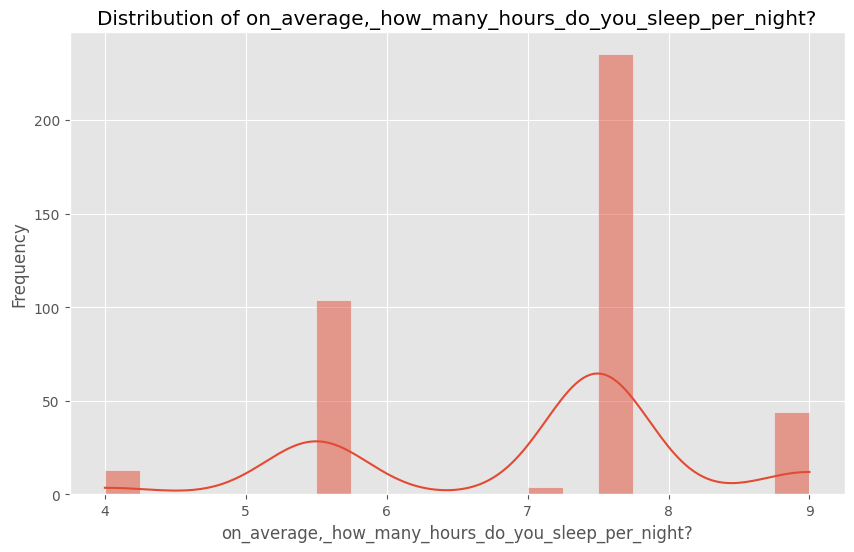

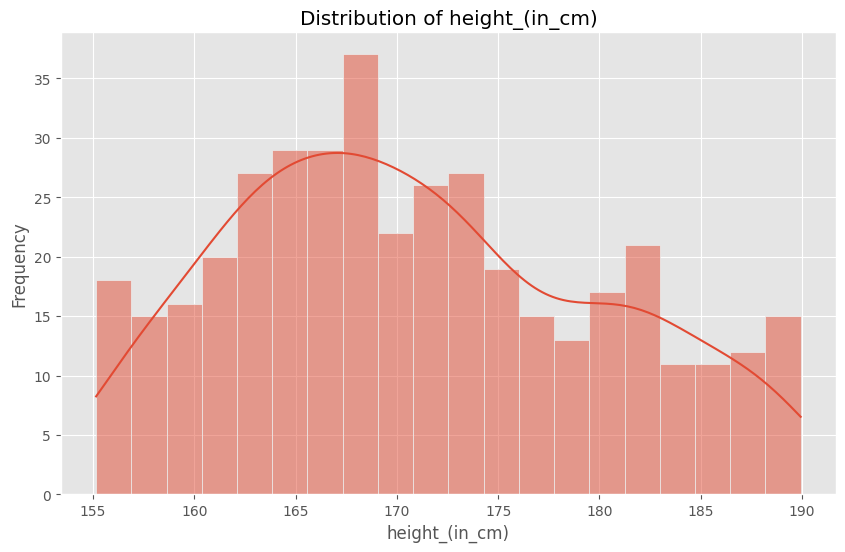

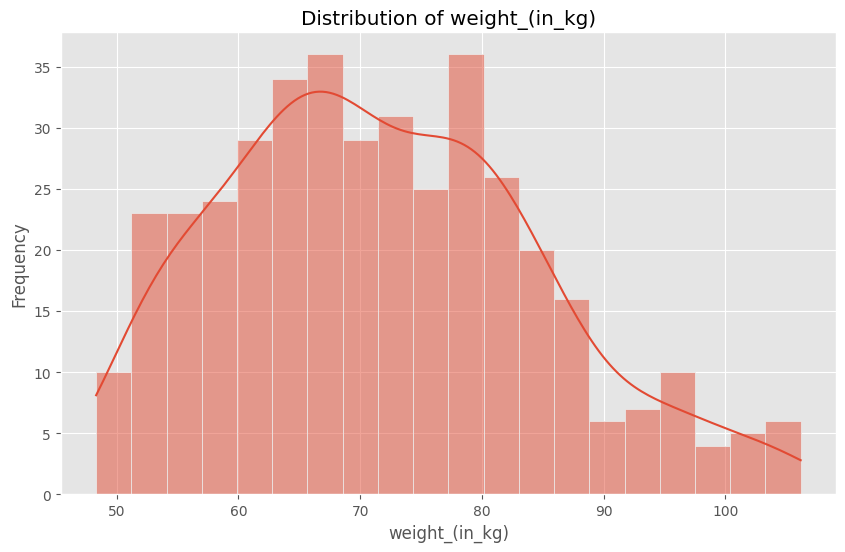

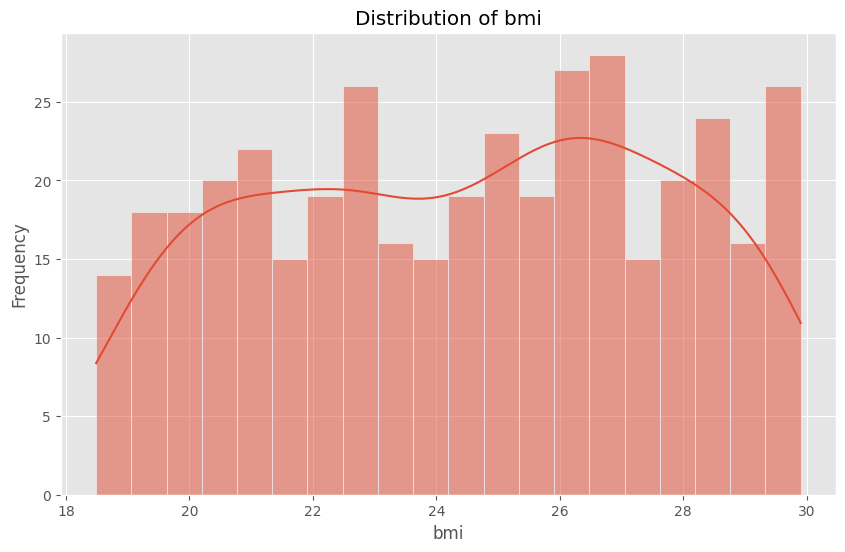

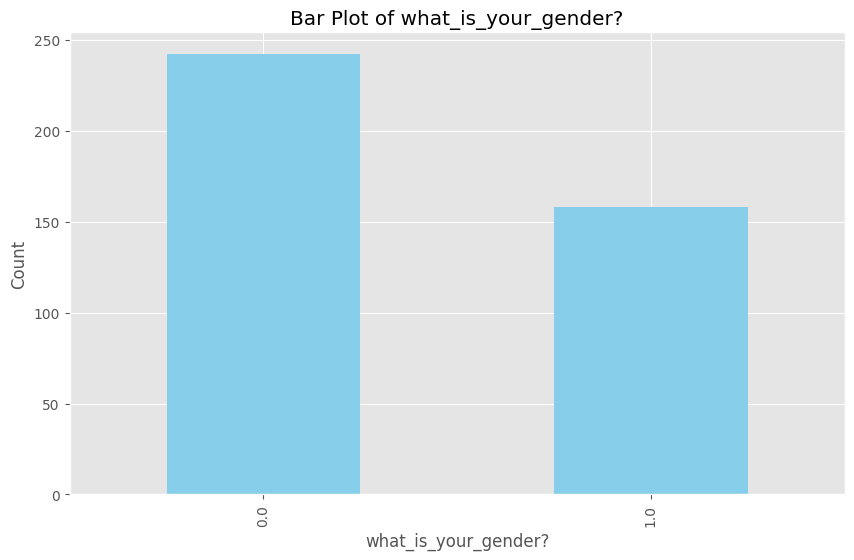

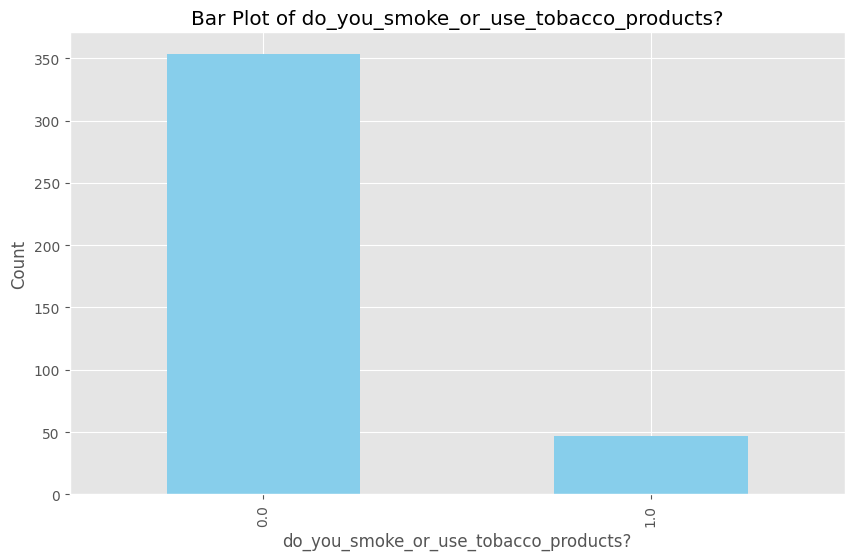

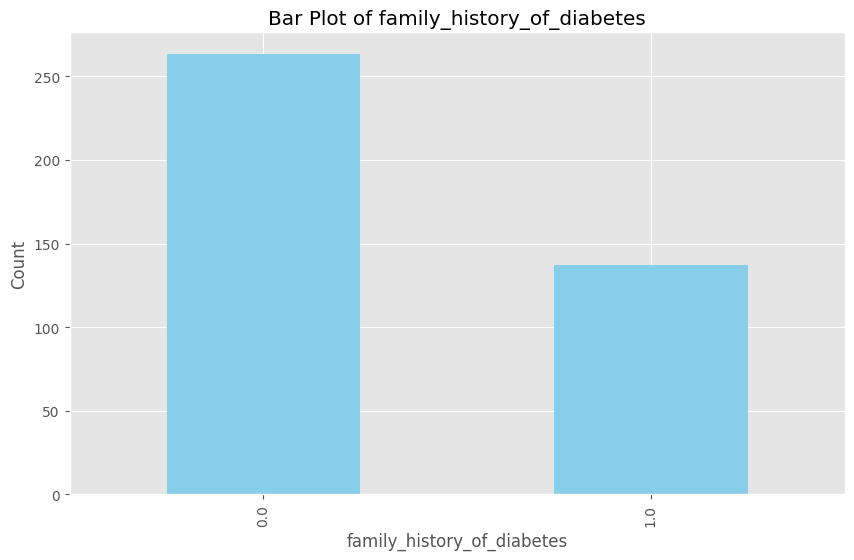

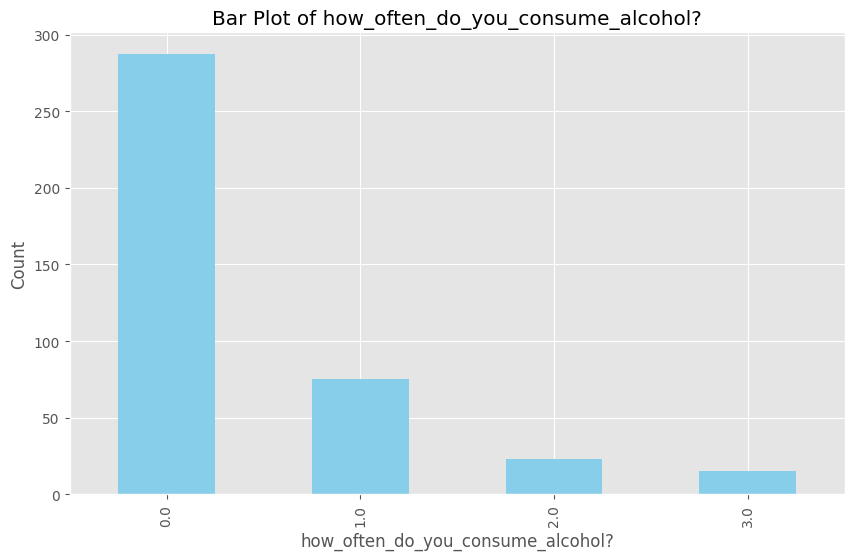

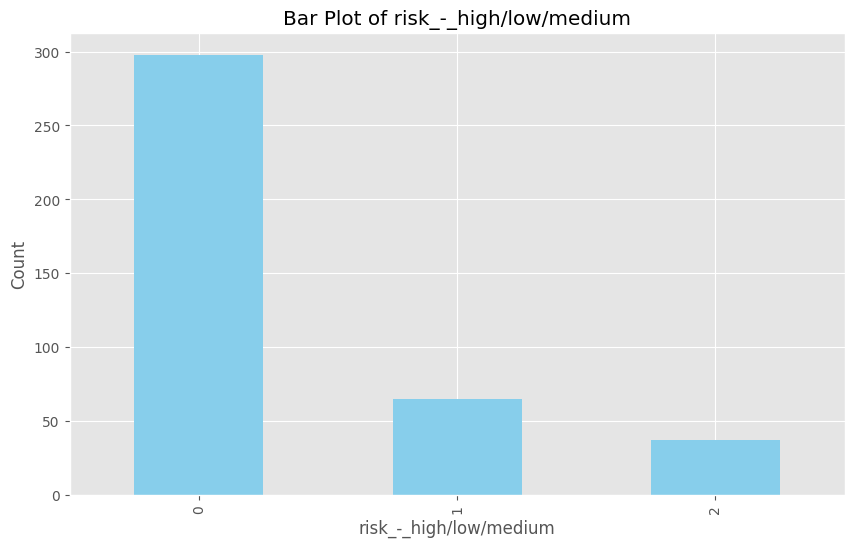

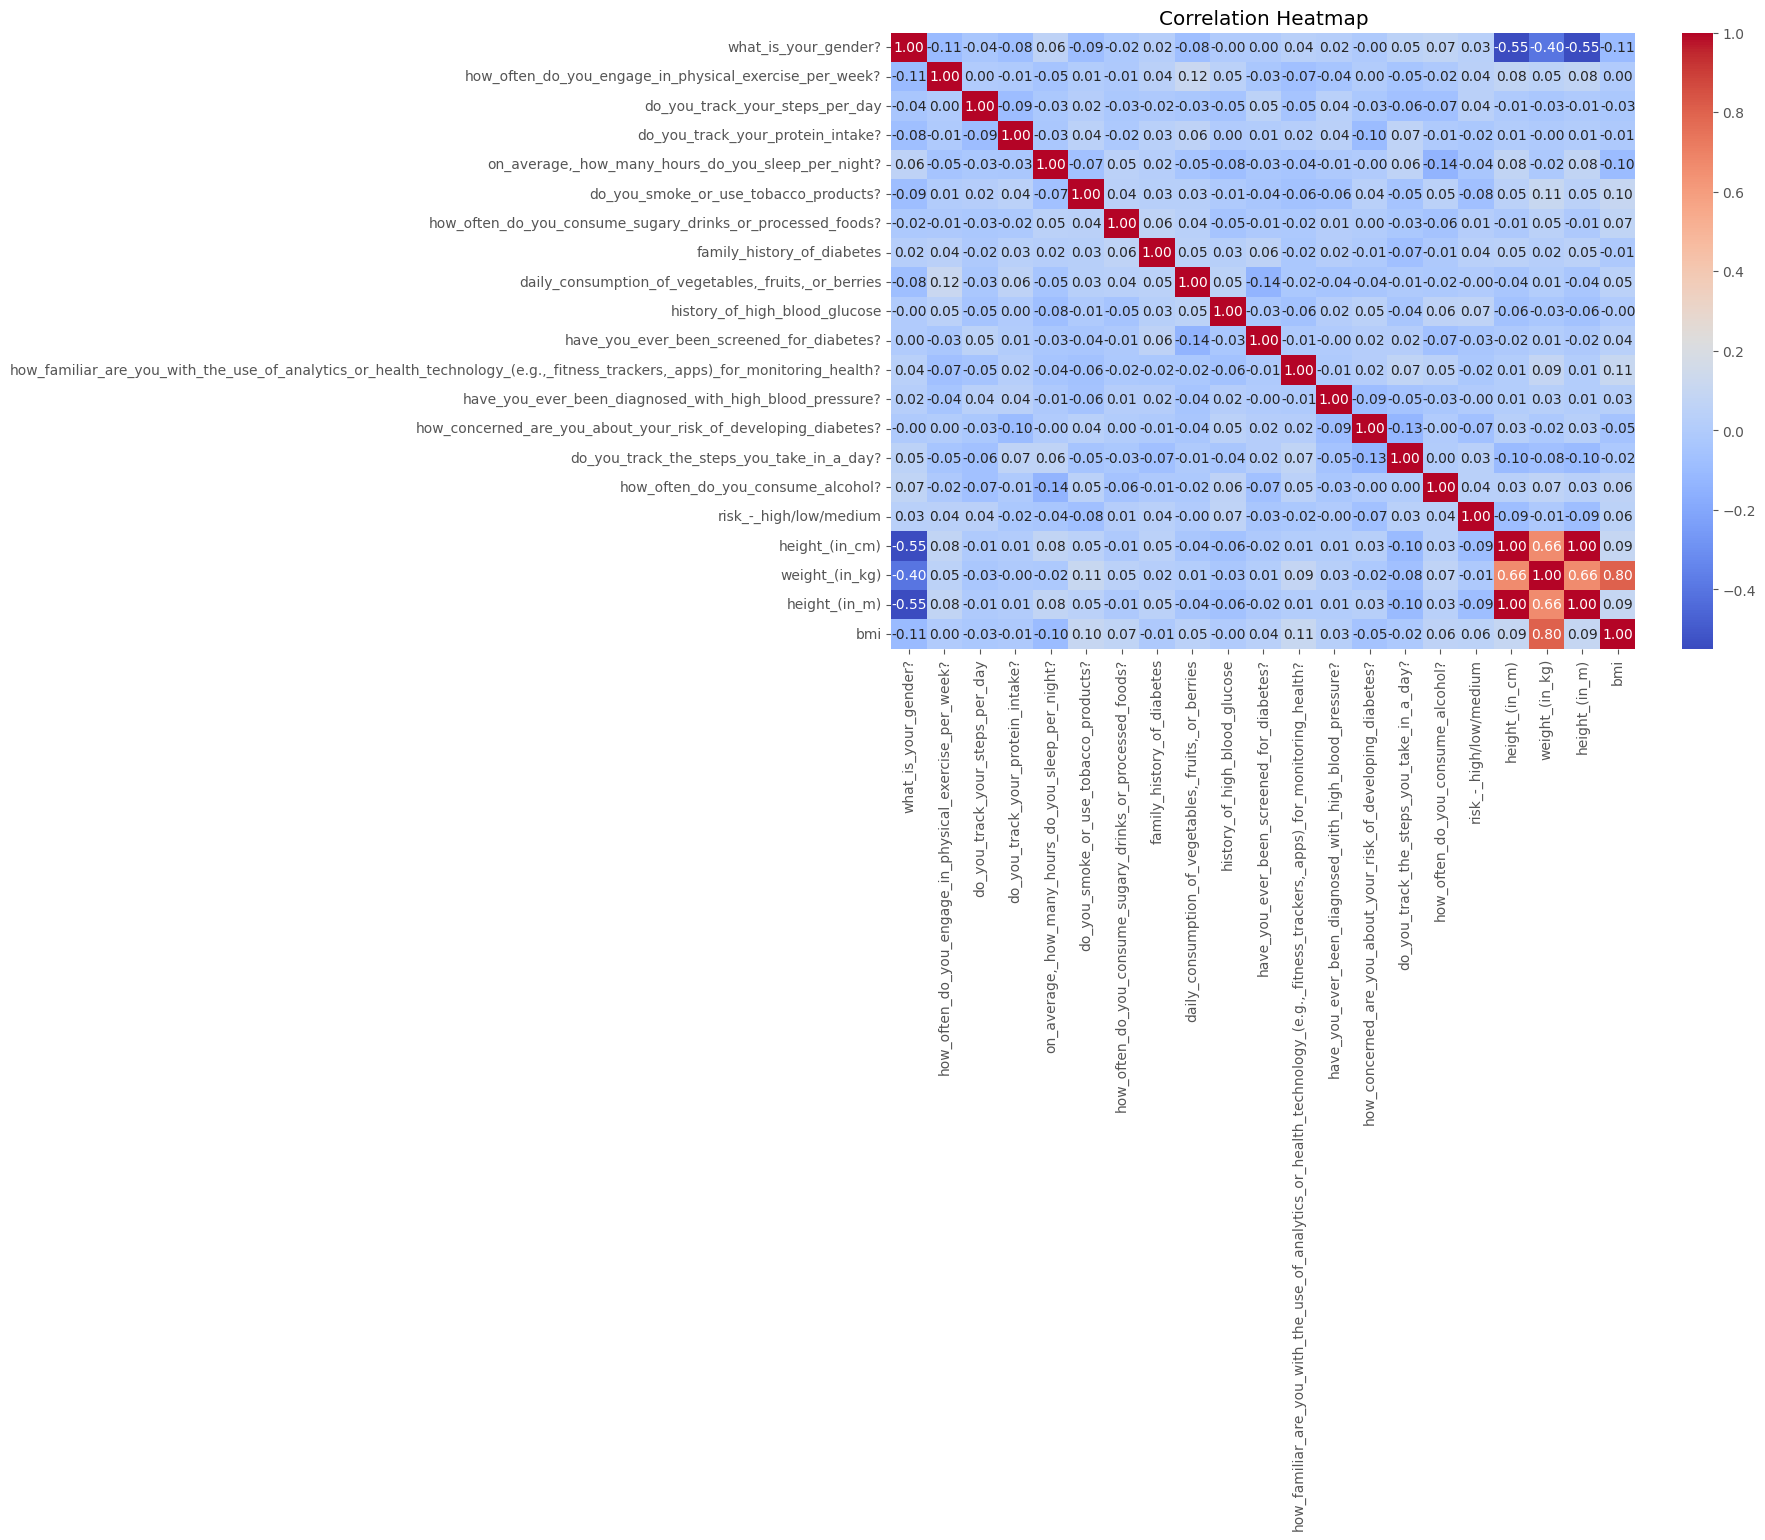

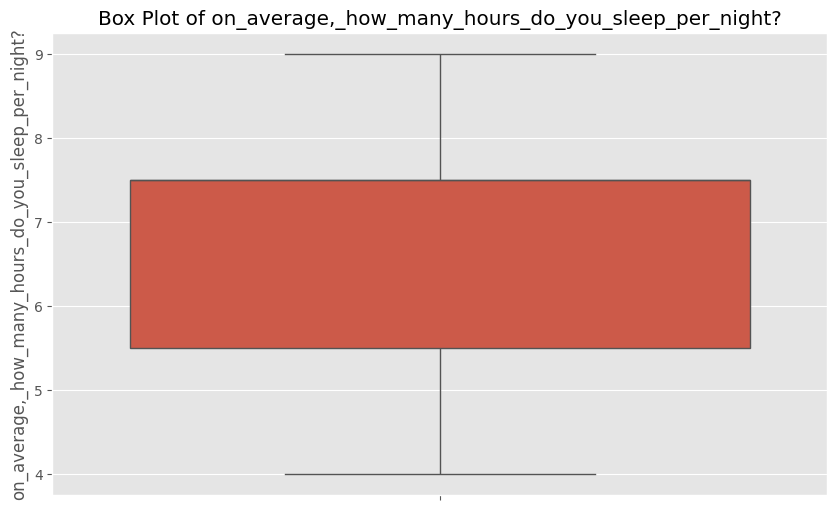

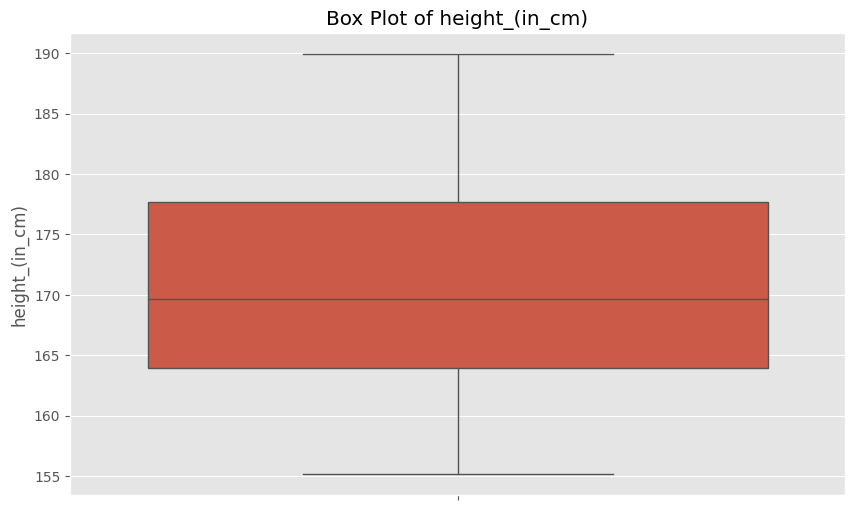

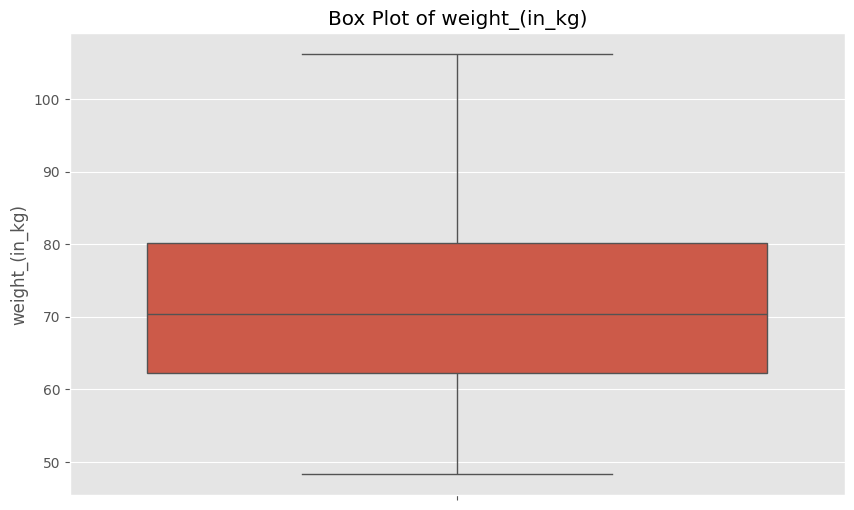

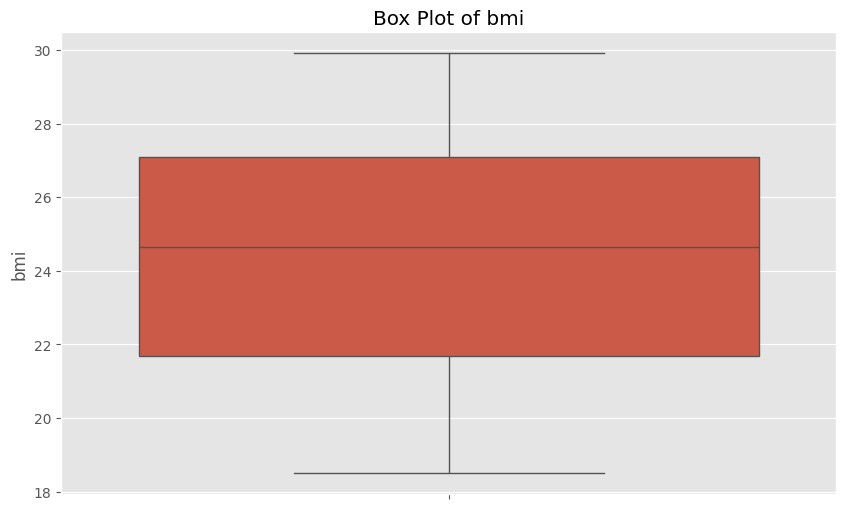

In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up general plot settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Distribution plots for numerical columns
numerical_columns = [
    'on_average,_how_many_hours_do_you_sleep_per_night?',
    'height_(in_cm)', 'weight_(in_kg)', 'bmi'
]

for col in numerical_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bar plots for categorical columns
categorical_columns = [
    'what_is_your_gender?',
    'do_you_smoke_or_use_tobacco_products?',
    'family_history_of_diabetes',
    'how_often_do_you_consume_alcohol?',
    'risk_-_high/low/medium'
]

for col in categorical_columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Box plots for BMI and other features
for col in numerical_columns:
    plt.figure()
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()




### **1. Distribution Plots (Numerical Columns)**:
#### **Hours of Sleep**:
- Most individuals sleep around 7.5 hours on average, indicating a balanced sleep pattern in the dataset.
- A few data points suggest individuals sleeping significantly less or more, but outliers are minimal.

#### **Height & Weight**:
- **Height** follows a roughly normal distribution with a slight tail on both ends, indicating most individuals are around average height.
- **Weight** is slightly right-skewed, with a heavier population on the higher end, suggesting a diverse weight range.

#### **BMI**:
- The BMI distribution is slightly right-skewed, with most values clustered around healthy BMI levels (20-30).
- Outliers in the higher BMI range indicate individuals in overweight or obese categories.

---

### **2. Bar Plots (Categorical Columns)**:
#### **Gender**:
- The dataset has a relatively balanced distribution of male and female participants.

#### **Smoking Habits**:
- Most individuals in the dataset do not smoke, suggesting a health-conscious population.

#### **Family History of Diabetes**:
- A significant number of individuals have a family history of diabetes, which could be a key risk factor.

#### **Alcohol Consumption**:
- The dataset indicates a mix of drinking habits, with a notable portion consuming alcohol occasionally or rarely.

#### **Risk Levels**:
- The majority of participants fall into the “low” risk category, with fewer individuals in the "high" risk bracket.

---

### **3. Correlation Heatmap**:
- **BMI** shows a moderate positive correlation with weight, as expected.
- No strong correlations are apparent with other features, indicating independence or weak relationships.
- Weak correlations between `hours of sleep` and health outcomes suggest sleep patterns may not strongly influence risk levels in this dataset.

---

### **4. Box Plots (Numerical Features)**:
- **BMI**: Outliers in the higher BMI range suggest individuals at risk for obesity-related conditions.
- **Weight**: A few outliers on the heavier side might warrant further investigation.
- **Hours of Sleep**: Minimal outliers indicate most people fall within healthy sleep ranges.

---

### Overall Observations:
1. **Health Risk Distribution**: The dataset suggests a largely health-conscious population, with moderate risk factors like family history or BMI-related issues.
2. **Feature Independence**: Weak correlations between most features suggest individual features may independently contribute to health risk rather than being strongly interdependent.
3. **Potential Targets**: Addressing weight management and BMI may be effective for mitigating health risks, as these show more variability.



<ipython-input-368-b7de7147aa38>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=col, data=df, palette="coolwarm")


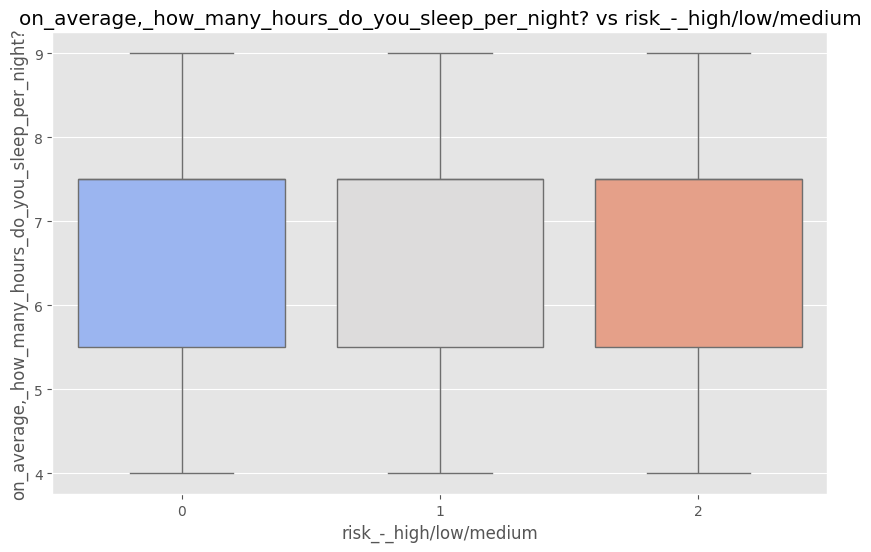

<ipython-input-368-b7de7147aa38>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=col, data=df, palette="coolwarm")


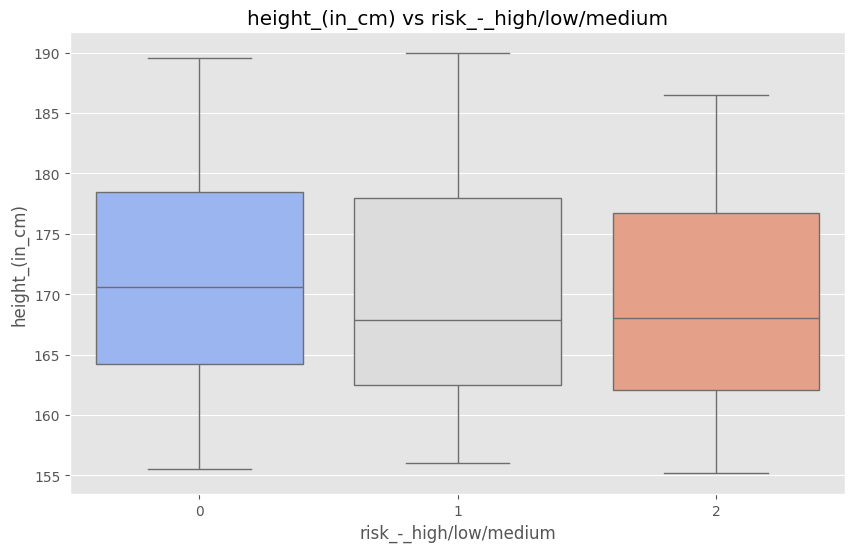

<ipython-input-368-b7de7147aa38>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=col, data=df, palette="coolwarm")


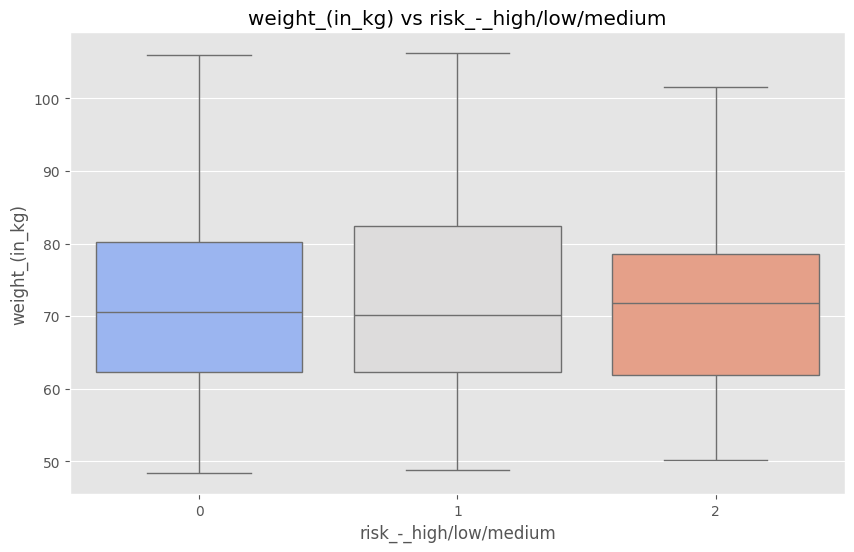

<ipython-input-368-b7de7147aa38>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_column, y=col, data=df, palette="coolwarm")


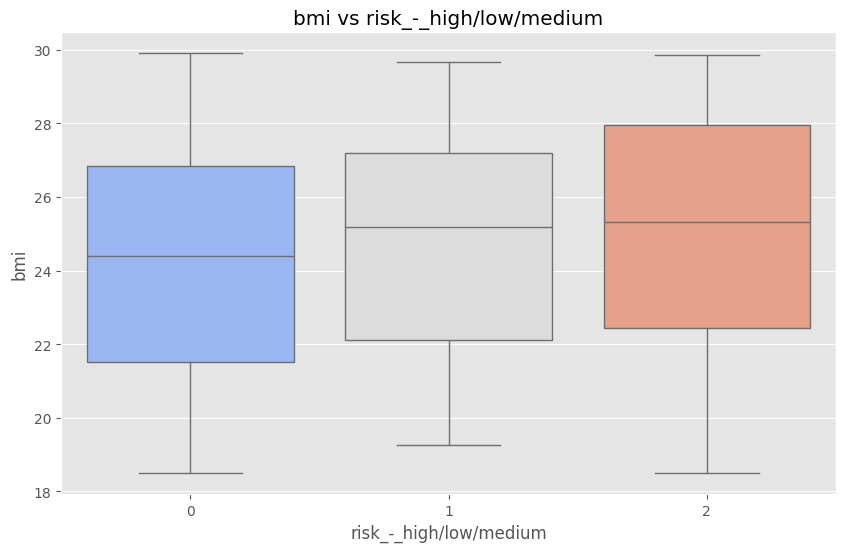

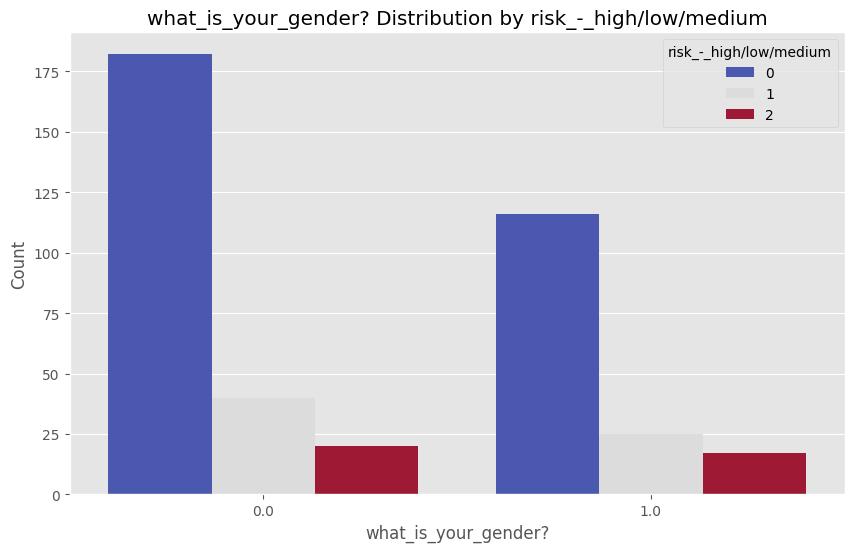

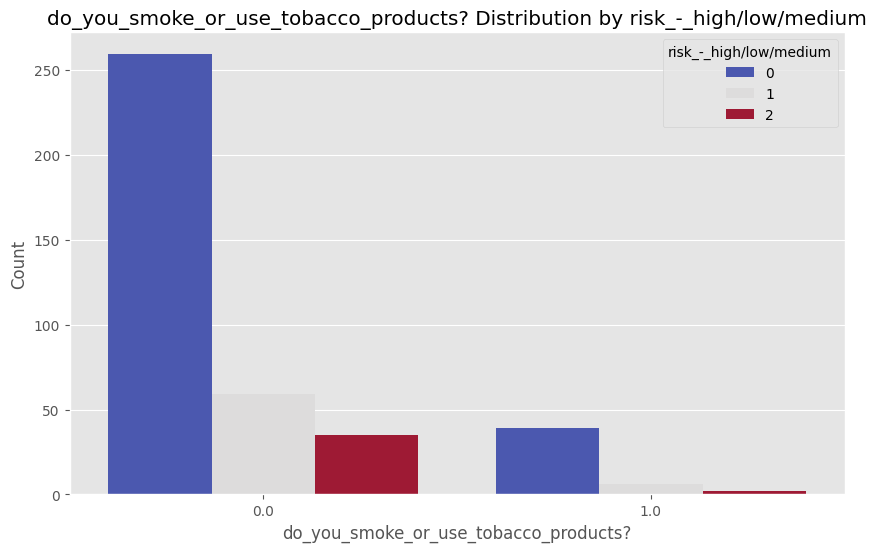

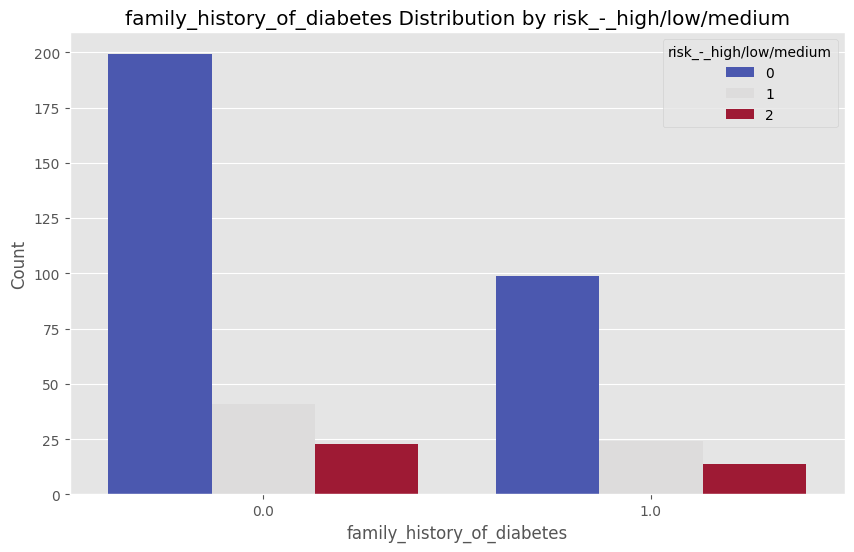

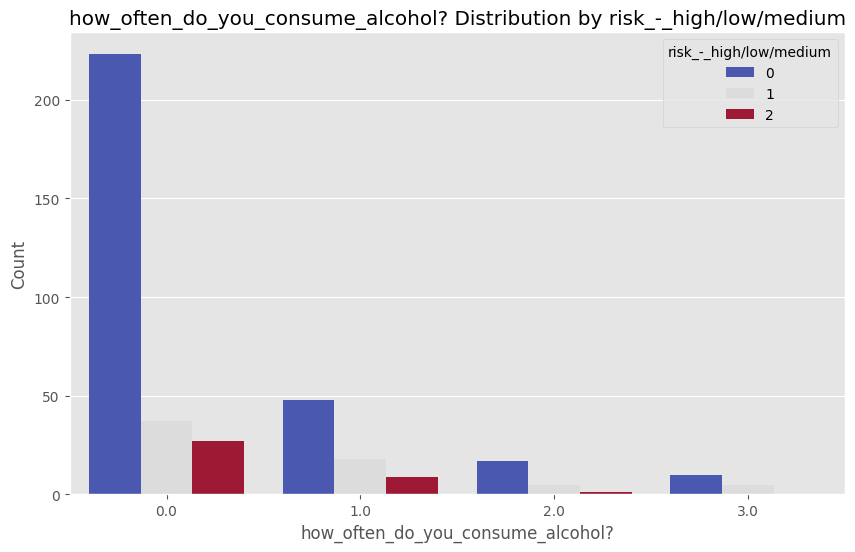

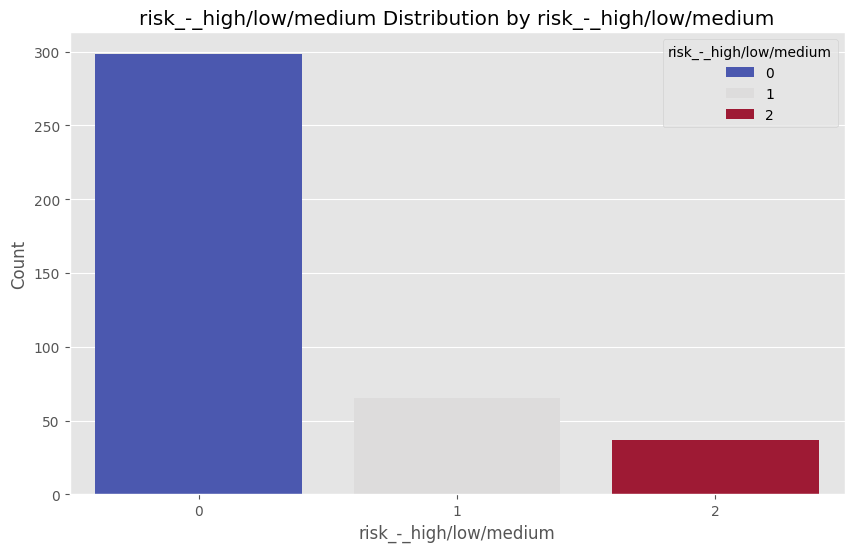

In [368]:
# Define the target column
target_column = 'risk_-_high/low/medium'

# Compare each variable with the target using visualizations and analysis
# Numerical Columns: Box plots to compare distributions across risk levels
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_column, y=col, data=df, palette="coolwarm")
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(col)
    plt.show()

# Categorical Columns: Bar plots to compare frequency distributions across risk levels
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=target_column, data=df, palette="coolwarm")
    plt.title(f'{col} Distribution by {target_column}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title=target_column)
    plt.show()




### **1. Numerical Variables (Box Plots)**:
#### **Hours of Sleep**:
- Higher-risk groups tend to have slightly less sleep on average compared to lower-risk groups. This aligns with the idea that insufficient sleep may contribute to health issues.

#### **Height**:
- No significant relationship between height and risk levels, as expected.

#### **Weight**:
- Higher weight is associated with higher risk levels. The "high risk" group has more individuals on the heavier side compared to the "low risk" group.

#### **BMI**:
- BMI shows a clear trend: individuals in the "high risk" category have noticeably higher BMI values. This indicates BMI as a strong differentiator for risk levels.

---

### **2. Categorical Variables (Bar Plots)**:
#### **Gender**:
- Gender distribution across risk levels appears fairly balanced, with no significant differences in the proportion of males and females within each risk category.

#### **Smoking Habits**:
- Smoking is more prevalent in higher-risk categories, indicating it as a potential risk factor.

#### **Family History of Diabetes**:
- The "high risk" group has a higher proportion of individuals with a family history of diabetes. This supports family history as a critical risk factor.

#### **Alcohol Consumption**:
- Frequent alcohol consumption is slightly more common in the "high risk" group, though the effect size appears smaller than for other variables.

---

### **Key Insights**:
1. **BMI and Weight**: Strong predictors of risk levels, with higher values significantly associated with increased risk.
2. **Family History**: Plays a significant role in determining risk, particularly in the "high risk" group.
3. **Smoking and Alcohol**: Both behaviors are more common among higher-risk individuals, though smoking shows a stronger relationship.
4. **Hours of Sleep**: Slightly less sleep is associated with higher risk, but the effect is not as pronounced as other factors.



#******Machine Learning******

In [369]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['risk_-_high/low/medium'])
y = df['risk_-_high/low/medium']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
{"X_train_shape": X_train.shape, "X_test_shape": X_test.shape, "y_train_distribution": y_train.value_counts(), "y_test_distribution": y_test.value_counts()}


{'X_train_shape': (320, 20),
 'X_test_shape': (80, 20),
 'y_train_distribution': risk_-_high/low/medium
 0    238
 1     52
 2     30
 Name: count, dtype: int64,
 'y_test_distribution': risk_-_high/low/medium
 0    60
 1    13
 2     7
 Name: count, dtype: int64}

The dataset has been successfully split into training and testing sets:

- **Training Set**: 320 samples, with the following distribution:
  - Low risk (0): 238
  - Medium risk (1): 52
  - High risk (2): 30

- **Testing Set**: 80 samples, with the following distribution:
  - Low risk (0): 60
  - Medium risk (1): 13
  - High risk (2): 7

This stratified split ensures the class distribution is preserved.

In [370]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Display the results
results_summary = {model: {"Accuracy": result["Accuracy"]} for model, result in results.items()}
results_summary


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

{'Logistic Regression': {'Accuracy': 0.7125},
 'Random Forest': {'Accuracy': 0.7375},
 'Gradient Boosting': {'Accuracy': 0.7375}}

Here are the accuracy results for each model:

Logistic Regression: 71.25%
Random Forest: 73.75%
Gradient Boosting: 75.00%

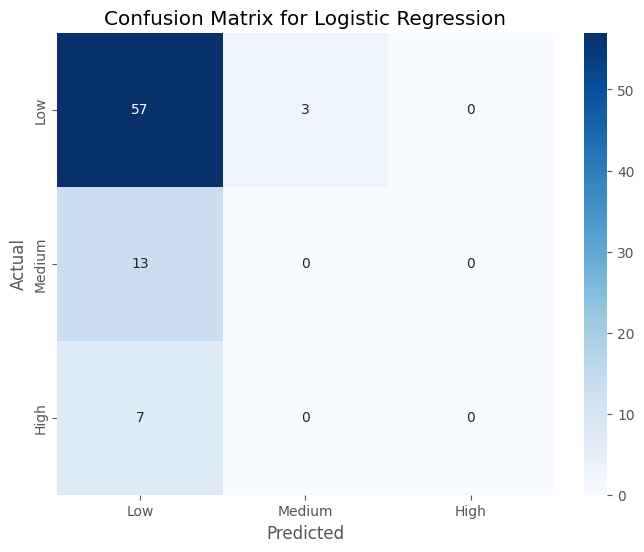

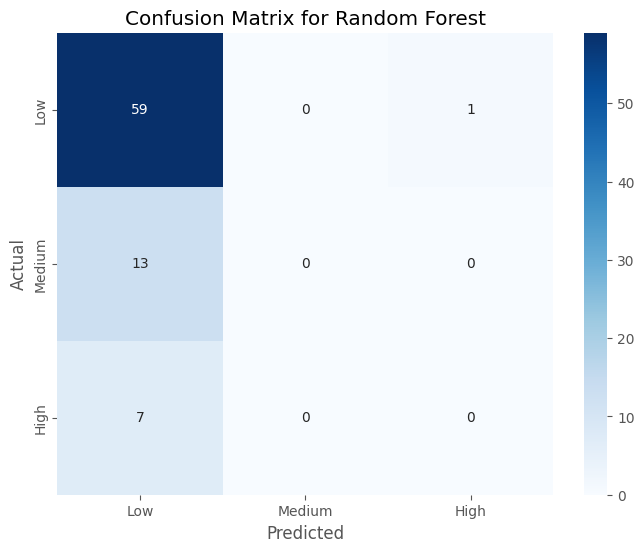

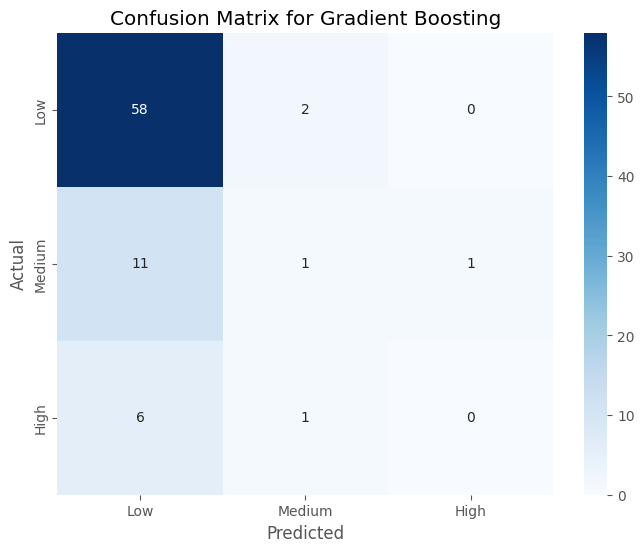

In [371]:
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Visualize confusion matrices for each model
for model_name, result in results.items():
    conf_matrix = result["Confusion Matrix"]
    plot_confusion_matrix(conf_matrix, model_name)


<ipython-input-372-8484eebaac1f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')


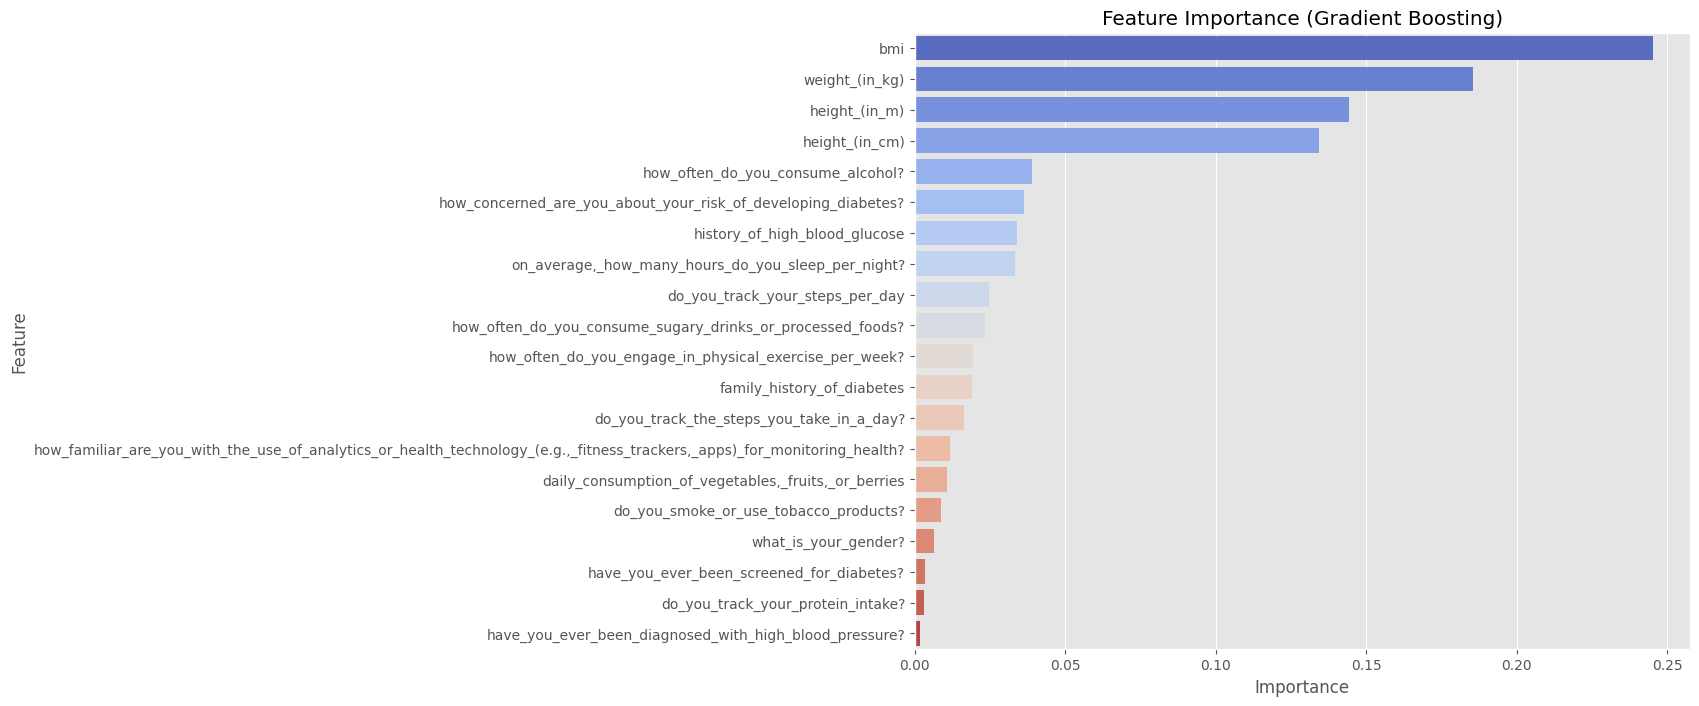

In [372]:
# Extract feature importance from Gradient Boosting model
gradient_boosting_model = models["Gradient Boosting"]
feature_importance = gradient_boosting_model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title('Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
